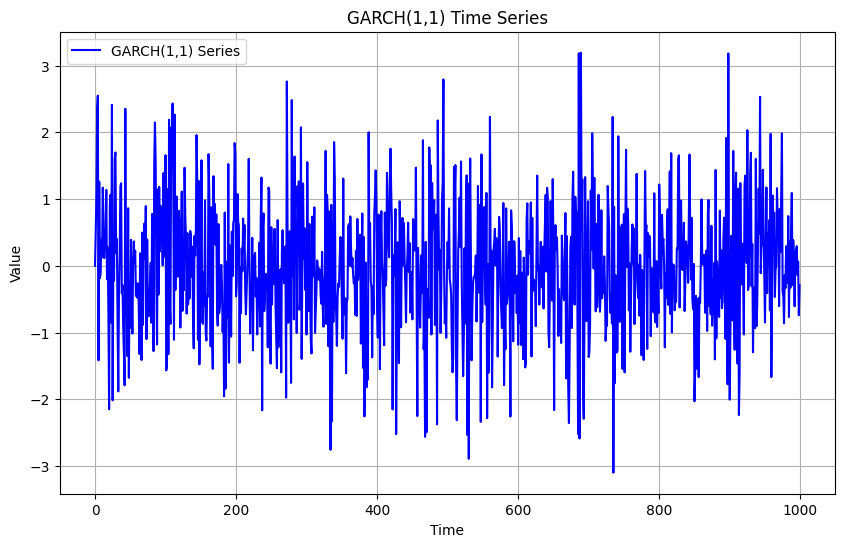

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from arch import arch_model

# Generate synthetic data for demonstration
np.random.seed(0)
n_samples = 1000
mean = 0
sigma = 1
noise = np.random.normal(mean, sigma, size=n_samples)

# Define GARCH parameters
omega = 0.1
alpha = 0.2
beta = 0.7

# Generate GARCH(1,1) time series
garch_series = np.zeros(n_samples)
sigma_sq = np.zeros(n_samples)
sigma_sq[0] = sigma ** 2  # Initial volatility
for t in range(1, n_samples):
    sigma_sq[t] = omega + alpha * noise[t-1]**2 + beta * sigma_sq[t-1]
    garch_series[t] = noise[t] * np.sqrt(sigma_sq[t])

# Plot the GARCH(1,1) time series
plt.figure(figsize=(10, 6))
plt.plot(range(n_samples), garch_series, label='GARCH(1,1) Series', color='blue')
plt.title('GARCH(1,1) Time Series')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()




In [4]:
# Fit GARCH(1,1) model using the arch library
garch_model = arch_model(garch_series)
res = garch_model.fit()

# Print model summary
print(res.summary())

Iteration:      1,   Func. Count:      6,   Neg. LLF: 3514.157630237537
Iteration:      2,   Func. Count:     14,   Neg. LLF: 1422325.2718784276
Iteration:      3,   Func. Count:     21,   Neg. LLF: 1426.390507289586
Iteration:      4,   Func. Count:     29,   Neg. LLF: 1385.5510630259014
Iteration:      5,   Func. Count:     35,   Neg. LLF: 1364.6069242003778
Iteration:      6,   Func. Count:     40,   Neg. LLF: 1364.6069126484692
Iteration:      7,   Func. Count:     44,   Neg. LLF: 1364.6069126483553
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1364.6069126484692
            Iterations: 7
            Function evaluations: 44
            Gradient evaluations: 7
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Li